In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
# Parametry
mu = 3
sigma = 1

# Generowanie danych
data_100 = np.random.normal(mu, sigma, 100)
data_10000 = np.random.normal(mu, sigma, 10000)

# Funkcje pomocnicze
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)

def summary_stats(data):
    q0, q1, q3, q4 = np.quantile(data, [0, 0.25, 0.75, 1])
    return {
        "Średnia": np.mean(data),
        "Mediana": np.median(data),
        "Moda": stats.mode(data, keepdims=True)[0][0],
        "Min": q0,
        "Q1": q1,
        "Q3": q3,
        "Max": q4,
        "Zakres": np.ptp(data),
        "Wariancja": np.var(data, ddof=1),
        "Odch. std": np.std(data, ddof=1)
    }



           Średnia   Mediana      Moda       Min        Q1        Q3  \
n=100     3.148650  3.182968  1.194801  1.194801  2.502142  3.752016   
n=10 000  2.994785  2.987445 -1.491181 -1.491181  2.317665  3.674032   

               Max    Zakres  Wariancja  Odch. std  
n=100     5.282502  4.087701   0.817300   0.904047  
n=10 000  6.824021  8.315203   1.005731   1.002862  


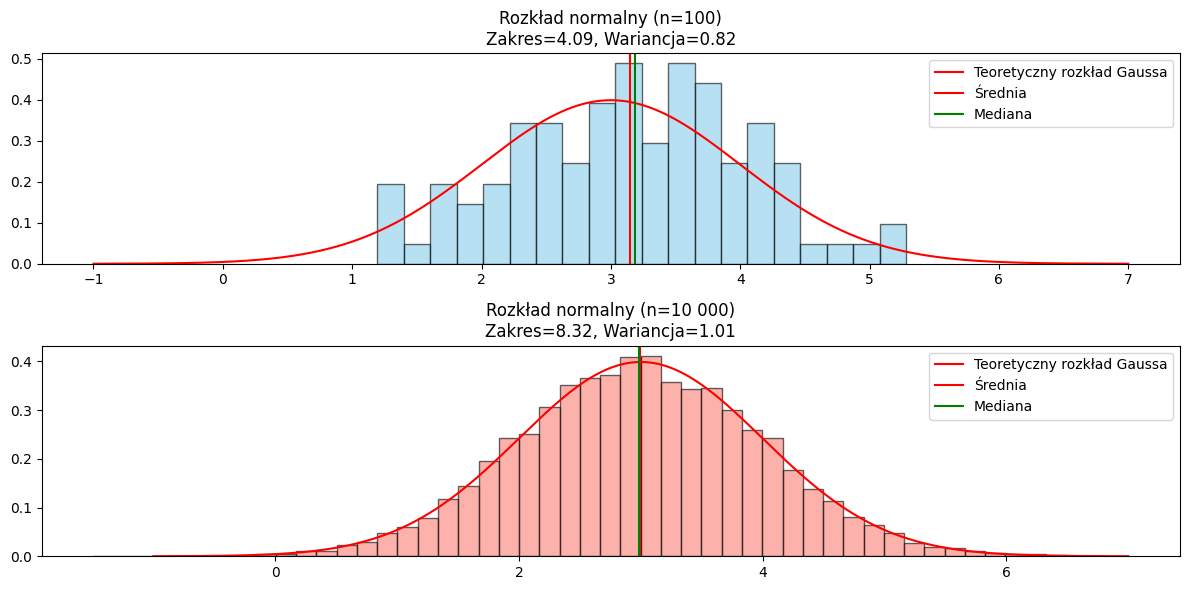

In [50]:

# Obliczenie statystyk
stats_100 = summary_stats(data_100)
stats_10000 = summary_stats(data_10000)

# Zbiorcza tabela
df_stats = pd.DataFrame([stats_100, stats_10000], index=["n=100", "n=10 000"])
print(df_stats)

# Wykresy
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.figure(figsize=(12, 6))

# Wykres n=100
plt.subplot(2, 1, 1)
plt.hist(data_100, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot(x, gauss(x, sigma, mu), 'r-', label='Teoretyczny rozkład Gaussa')
plt.axvline(np.mean(data_100), color='red', label='Średnia')
plt.axvline(np.median(data_100), color='green', label='Mediana')
plt.title(f'Rozkład normalny (n=100)\nZakres={stats_100["Zakres"]:.2f}, Wariancja={stats_100["Wariancja"]:.2f}')
plt.legend()

# Wykres n=10 000
plt.subplot(2, 1, 2)
plt.hist(data_10000, bins=50, density=True, alpha=0.6, color='salmon', edgecolor='black')
plt.plot(x, gauss(x, sigma, mu), 'r-', label='Teoretyczny rozkład Gaussa')
plt.axvline(np.mean(data_10000), color='red', label='Średnia')
plt.axvline(np.median(data_10000), color='green', label='Mediana')
plt.title(f'Rozkład normalny (n=10 000)\nZakres={stats_10000["Zakres"]:.2f}, Wariancja={stats_10000["Wariancja"]:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

**Opis**

1. Zbiór z 10 000 obserwacji dużo lepiej odzwierciedla rozkład normalny.
- Średnia i mediana są bardzo bliskie wartości oczekiwanej (3),
- Odchylenie standardowe i wariancja prawie idealnie odpowiadają teoretycznym parametrom,
- Histogram ma gładki kształt typowy dla krzywej Gaussa.

2. Zbiór z 100 obserwacji pokazuje większe odchylenia przypadkowe.
- Wyniki średniej, mediany czy wariancji mogą bardziej odbiegać od wartości teoretycznych,
- Histogram jest mniej regularny — ma bardziej „poszarpany” kształt,
- Zakres danych bywa węższy, bo przy małej próbie rzadziej trafiają się wartości skrajne.

Wniosek:

Gdy zwiększamy liczbę danych, statystyki opisowe (średnia, wariancja, mediana itd.) coraz dokładniej przybliżają rzeczywiste parametry rozkładu.
Im większa próba, tym bardziej wyniki odzwierciedlają teorię i tym mniej widoczne są przypadkowe wahania.